# TITANIC DATA ANALYSIS
  On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the deaths of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others
Here are some possible questions you could explore and answer using the Titanic dataset:

1. Survival Rate:
- What is the overall survival rate?
- How does the survival rate differ between genders?
- How does the survival rate differ between classes (1st, 2nd, and 3rd)?
  
2. Age Distribution:
- What is the distribution of ages on the Titanic?
- How does the age distribution differ between classes?
  
3. Fare Distribution:
- What is the distribution of fares paid by passengers?
- How does the fare distribution differ between classes?
  
4. Family Relationships:
- What is the proportion of passengers traveling with family members?
- How does the survival rate differ between passengers with and without family?
  
5. Embarkation Port:
- What is the distribution of passengers from different embarkation ports?
- Is there a correlation between the embarkation port and survival?
  
6. Cabin Class and Survival:
- How does the survival rate vary based on cabin class?
- Is there a correlation between cabin location and survival?
  
7. Name Analysis:
- Can you extract any insights from the titles in passengers' names (e.g., Mr., Mrs., Miss)?
- Is there a correlation between name prefixes and survival?
  
8. Missing Data:
- What is the extent of missing data in the dataset?
- How might you handle missing data for age, cabin, and embarked?
  
9. Feature Correlations
- Are there correlations between different features (e.g., age and fare)?
- What features are most strongly correlated with survival?



In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
data = pd.read_csv('titanic.csv', sep = ',')

In [20]:
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [7]:
data.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,369.478992,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,248.767105,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
data.shape

(1309, 13)

## SURVIVAL RATE

### - What is the overall survival rate?

In [9]:
survived = data['Survived'].value_counts()
percentage_survived = (survived[1]/survived.sum()) * 100
print(f'The Overall Survival Rate is:{percentage_survived: .2f}%')

The Overall Survival Rate is: 38.38%


### - How does the survival rate differ between genders?

In [9]:
survival_by_gender = data.groupby('Sex')['Survived'].mean() * 100
survival_by_gender

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

### - How does the survival rate differ between classes?

In [10]:
survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

## AGE DISTRIBUTION 

### - What is the distribution of ages in the Titanic?

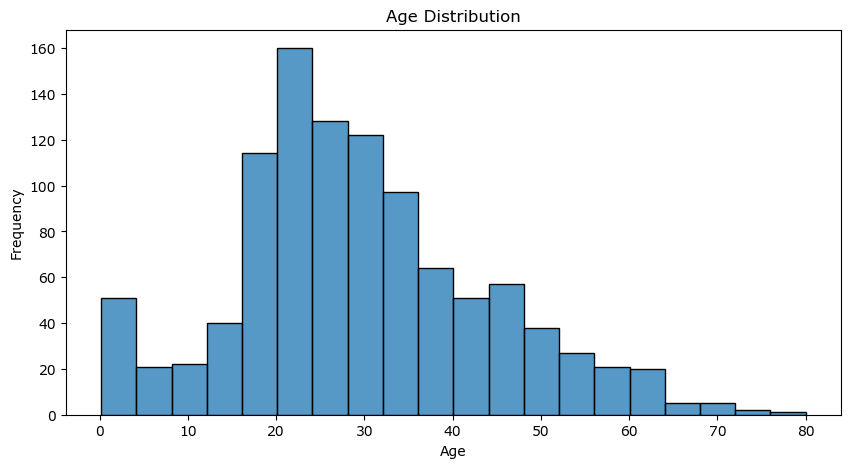

In [11]:
plt.figure(figsize = (10,5))
sns.histplot(data['Age'], bins = 20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### - How does the age distribution differ between classes?

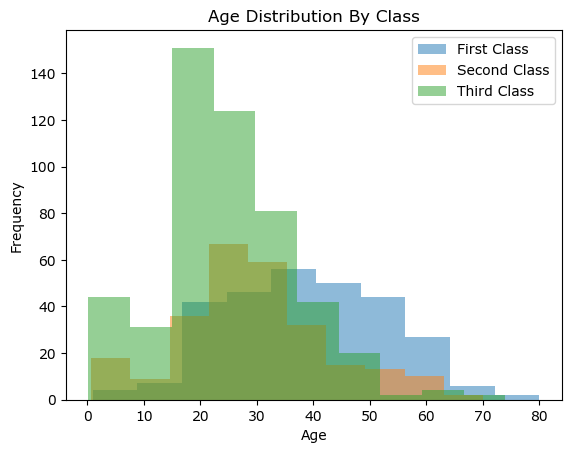

In [12]:
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in data.groupby('Pclass')['Age']:
    plt.hist(data, alpha = 0.5, label = class_labels[class_val])

plt.title('Age Distribution By Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## FARE DISTRIBUTION

### - What is the distribution of fares paid by passengers?

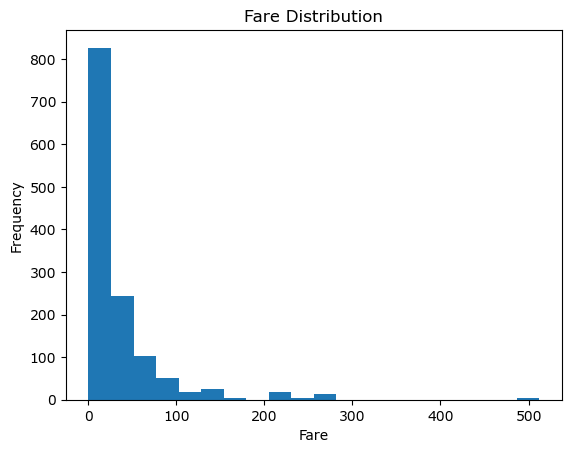

In [16]:
data['Fare'].hist(bins = 20, grid = False)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### - How does the fare distribution differ between classes?

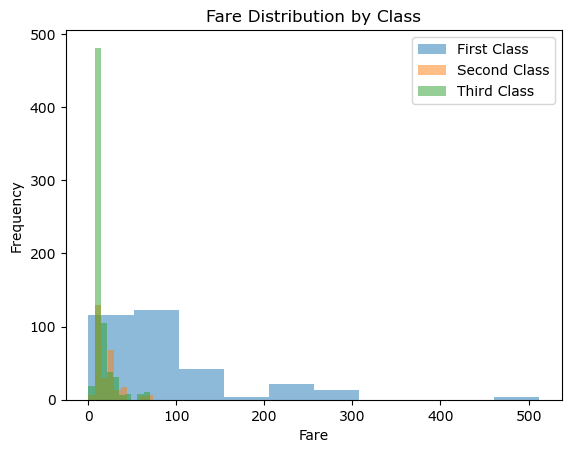

In [17]:
class_labels ={1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in data.groupby('Pclass')['Fare']:
    plt.hist(data, alpha = 0.5, label = class_labels[class_val])

plt.title('Fare Distribution by Class')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## FAMILY RELATIONSHIPS

### - What is the proportion of passengers traveling with family members?

In [21]:
data['Family'] = data['SibSp'] + data['Parch']
proportion_with_family = (data[data['Family'] > 0].shape[0] / data.shape[0]) * 100
print(f'Proportion of Passengers with Family: {proportion_with_family: .2f}%')

Proportion of Passengers with Family:  39.65%


### - How does the survival rate differ between passengers with and without family?

In [22]:
survival_with_family = data[data['Family'] > 0]['Survived'].mean() * 100
survival_without_family = data[data['Family'] == 0]['Survived'].mean() * 100
print(f'The survival rate for people with family: {survival_with_family: .2f}%')
print(f'The survival rate for people without family: {survival_without_family: .2f}%')

The survival rate for people with family:  50.56%
The survival rate for people without family:  30.35%


## EMBARKATION PORT

### - What is the distribution of passengers from different embarkation ports?

In [23]:
passengers_by_port = data['Embarked'].value_counts()
passengers_by_port

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

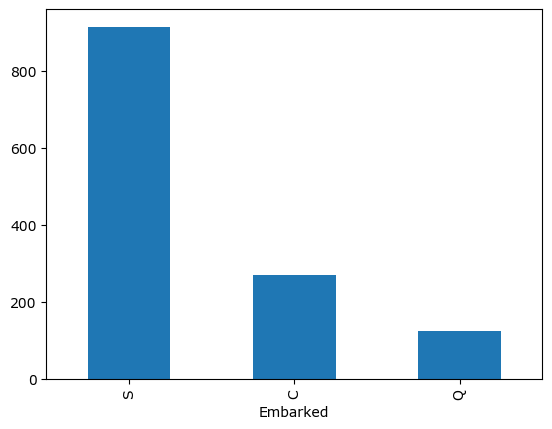

In [24]:
data['Embarked'].value_counts().plot(kind = 'bar');

### - Is there a correlation between the embarkation port and survival?

In [25]:
port_survival_correlation = data.groupby('Embarked')['Survived'].mean()
port_survival_correlation

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

## CABIN CLASS AND SURVIVAL

### - How does the survival rate vary based on cabin class?

In [26]:
survival_by_cabin_class = data.groupby('Cabin')['Survived'].mean() * 100
survival_by_cabin_class

Cabin
A10      0.0
A11      NaN
A14      0.0
A16    100.0
A18      NaN
       ...  
F33    100.0
F38      0.0
F4     100.0
G6      50.0
T        0.0
Name: Survived, Length: 186, dtype: float64

### - Is there a correlation between cabin location and survival?

In [27]:
cabin_survival_correlation = data.groupby('Cabin')['Survived'].mean()
cabin_survival_correlation.value_counts()

Survived
1.000000    85
0.000000    46
0.500000    13
0.666667     2
0.333333     1
Name: count, dtype: int64

## NAME ANALYSIS 

### - Can you extract any insights from the titles in passengers' names?

In [28]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
title_survival_correlation = data.groupby('Title')['Survived'].mean()
title_survival_correlation

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [29]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Mr


## MISSING DATA

### - What is the extent of missing data in the dataset?

In [30]:
data.isnull().sum()

Unnamed: 0        0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family            0
Title             0
dtype: int64

### - How might you handle missing data for Age, Cabin and Embarked?

- Age: Imputation using mean/median age for predictive models.
- Cabin: Consider dropping this feature due to high number of missing values or use it as a categorical variable.
- Embarked: Imputation with the mode value or other meaningful approaches.

## FEATURE CORRELATIONS

### - Are there correlations between different features?

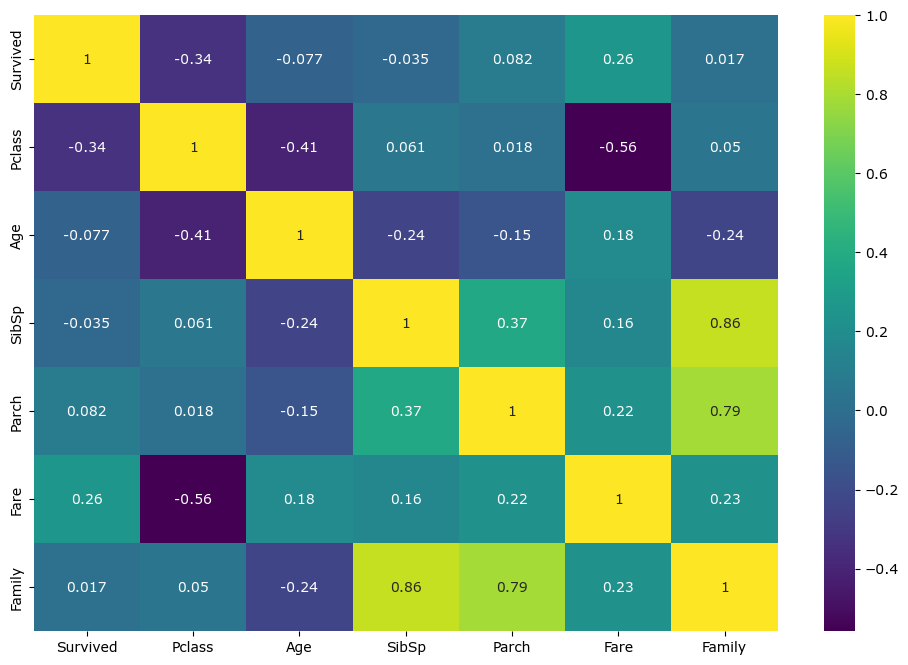

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(data[['Survived', 'Pclass', 'Age', 'SibSp',
'Parch', 'Fare', 'Family']].corr(), annot = True, cmap = 'viridis');

### - What features are most strongly correlated with survival?

In [32]:
strongest_survival_correlation = data[['Survived', 'Pclass', 'Age', 'SibSp',
                                       'Parch', 'Fare', 'Family']].corr()['Survived'].sort_values(ascending = False)
strongest_survival_correlation

Survived    1.000000
Fare        0.257307
Parch       0.081629
Family      0.016639
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64